<a href="https://colab.research.google.com/github/OmarJames8/Python_Project_WebScraping/blob/main/Revised_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.14
    Uninstalling yfinance-0.2.14:
      Successfully uninstalled yfinance-0.2.14


/bin/bash: mamba: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.8.0
    Uninstalling nbformat-5.8.0:
      Successfully uninstalled nbformat-5.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.7.2 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [48]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [50]:
tesla=yf.Ticker("TSLA")

In [51]:
print(tesla)

yfinance.Ticker object <TSLA>


In [52]:
!pip uninstall yfinance -y
!pip install yfinance


Found existing installation: yfinance 0.1.67
Uninstalling yfinance-0.1.67:
  Successfully uninstalled yfinance-0.1.67
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.2.14-py2.py3-none-any.whl (59 kB)


In [53]:
import yfinance as yf
import pandas as pd

# Ticker symbol for Tesla
tickerSymbol = 'TSLA'

# Get the data for this ticker
tesla = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [54]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

html_data = response.text


In [55]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')


In [56]:
tables=soup.find_all("tbody")[1]
    
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables.find_all("tr"):
    cols = row.find_all("td")
    revenue_date = cols[0].datetime
    revenue_dollars = cols[1].string
    tesla_revenue = tesla_revenue.append({"Date":revenue_date, "Revenue":revenue_dollars}, ignore_index=True)
tesla_revenue
tesla_revenue.tail()

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-56-e0850b4d24fa>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,Date,Revenue
49,None,$28
50,None,$21
51,None,None
52,None,$46
53,None,$27


In [57]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-57-2aef5327de36>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [58]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]



In [46]:
!pip install nbformat --upgrade
!pip install nbformat


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import plotly.graph_objs as go
import plotly.offline as pyo

def make_graph(stock_data, revenue_data, stock):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Stock Price'))
    fig.add_trace(go.Scatter(x=revenue_data.index, y=revenue_data['Revenue'], name='Revenue'))
    fig.update_layout(title=f"{stock} Stock Price vs Revenue",
                      xaxis_title="Year",
                      yaxis_title="Price/Revenue")
    pyo.plot(fig, filename=f"{stock}_graph.html")


In [65]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


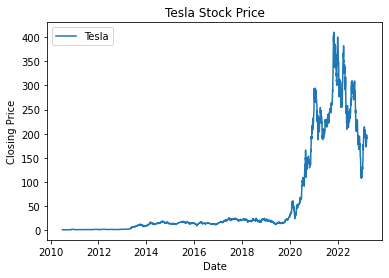

In [64]:
import matplotlib.pyplot as plt

# Plot the Tesla stock data
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Closing Price')

# Set the chart title
plt.title('Tesla Stock Price')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()


## Game Stop Stock Data 

In [66]:
import yfinance as yf

gme = yf.Ticker("GME")


In [73]:
import yfinance as yf
import pandas as pd

# Ticker symbol for GameStop
tickerSymbol = 'GME'

# Get the data for this ticker
gme = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data dataframe
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674833,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [69]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data = response.text


In [70]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')


In [79]:
tables=soup.find_all("tbody")[1]
    
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables.find_all("tr"):
    cols = row.find_all("td")
    revenue_date = cols[0].datetime
    revenue_dollars = cols[1].string
    gme_revenue = gme_revenue.append({"Date":revenue_date, "Revenue":revenue_dollars}, ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print(tables)
print(revenue_date, revenue_dollars)
print(gme_revenue["Revenue"])


<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>
</tr>
<tr>
<td style="text-align:center">2018-04-30</td>
<td style="text-align:center">$1,786</td>
</tr>
<tr>
<td style="text-align:center">2018-01-31</td>
<td style="text-align:center">$2,825</td>
</tr>
<t

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-79-fce406f2aee2>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [80]:
gme_revenue.tail()

,Date,Revenue


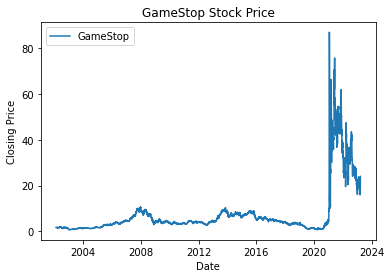

In [75]:
import matplotlib.pyplot as plt

# Plot the GameStop stock data
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Closing Price')

# Set the chart title
plt.title('GameStop Stock Price')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()
